In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv("Class_train.csv")
val=pd.read_csv("Class_prediction.csv")

In [70]:
train['Target'].value_counts()

False    1563
True      421
Name: Target, dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1992 non-null   float64
 1   2       1992 non-null   float64
 2   3       1993 non-null   float64
 3   Target  1984 non-null   object 
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [5]:
df=train.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1977 non-null   float64
 1   2       1977 non-null   float64
 2   3       1977 non-null   float64
 3   Target  1977 non-null   object 
dtypes: float64(3), object(1)
memory usage: 77.2+ KB


In [87]:
df1=df[df['1']<1] 
df1=df1[df1['2']<1] 
df1=df1[df1['3']<1800]

### i have removed outliers and missing values as they are of same class labels.

In [88]:
df1['Target']=df1['Target'].map(lambda x:1 if x==True else 0)

In [89]:
#correlation

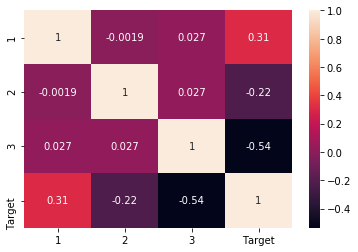

In [90]:
sns.heatmap(df1.corr(),annot=True)

## model-building on imbalanced data

In [91]:
##spliting dependent and independent
X=df1.drop('Target',axis=1)
y=df1['Target']

In [92]:
import statsmodels.api as sm
X_c=sm.add_constant(X)

In [93]:
model=sm.Logit(y,X_c)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.203182
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 1965
Model:                          Logit   Df Residuals:                     1961
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                  0.6079
Time:                        10:07:13   Log-Likelihood:                -399.25
converged:                       True   LL-Null:                       -1018.3
Covariance Type:            nonrobust   LLR p-value:                4.071e-268
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8143      0.631      6.041      0.000       2.577       5.052
1             16.4011      1.085     15.121      0.000      14.275      18.527
2            -17.1250      1.451    -11.804      0.000     -19.969     -14.281
3             -0.8930      0.052    -17.233      0.000      -0.995      -0.791
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [95]:
LR= LogisticRegression()
dt=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
clf = SVC(kernel='linear')

In [96]:
models = []
models.append(('Logistic Regression',LR))
models.append(('DT',dt))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('KNN',KNN))
models.append(('SVM',clf))

In [97]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Logistic Regression: 0.057982 (0.013238)
DT: 0.039090 (0.000967)
RandomForest: 0.045363 (0.005212)
Bagged: 0.032988 (0.006936)
AdaBoostRF: 0.034104 (0.006874)
GradientBoost: 0.033605 (0.010546)
KNN: 0.030313 (0.000929)
SVM: 0.027621 (0.007204)


Counter({0: 1546, 1: 419})


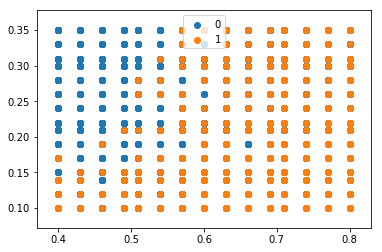

In [98]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X.iloc[row_ix,0], X.iloc[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

## IMBALANCE TREATMENT---SMOTE

In [99]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

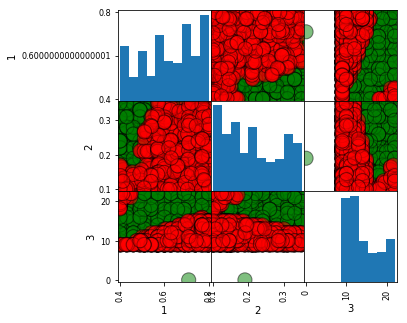

In [108]:
color_list = ['red' if i==1 else 'green' for i in y]
pd.plotting.scatter_matrix(X,
                                       c=color_list,
                                       figsize= [5,5],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = 'o',
                                       edgecolor= "black")
plt.show()

Counter({0: 1546, 1: 1546})


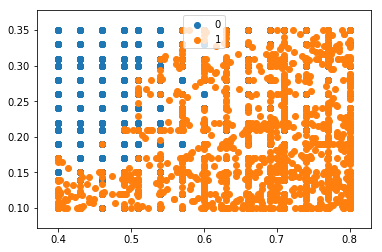

In [100]:
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X.iloc[row_ix,0], X.iloc[row_ix,1], label=str(label))
pyplot.legend()
pyplot.show()

In [101]:
## Model-building after balancing the classes.

In [102]:
models = []
models.append(('Logistic Regression',LR))
models.append(('DT',dt))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('KNN',KNN))
models.append(('SVM',clf))

In [103]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Logistic Regression: 0.084253 (0.005019)
DT: 0.026198 (0.002577)
RandomForest: 0.021023 (0.004374)
Bagged: 0.020374 (0.005392)
AdaBoostRF: 0.014878 (0.002439)
GradientBoost: 0.017787 (0.002791)
KNN: 0.024583 (0.003108)
SVM: 0.073826 (0.002993)


## by KFOLD we can use total data in checking the performance of the model and by comparing results Ensembling models are performing very well but it may lead to overfitting as our data is simple. due to this i want to prefer KNN over other models.

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [111]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9881465517241379


##  Model complexity:

    K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performance.
    Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
    If k is big, model that is less complex model can lead to underfit.
    At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%.

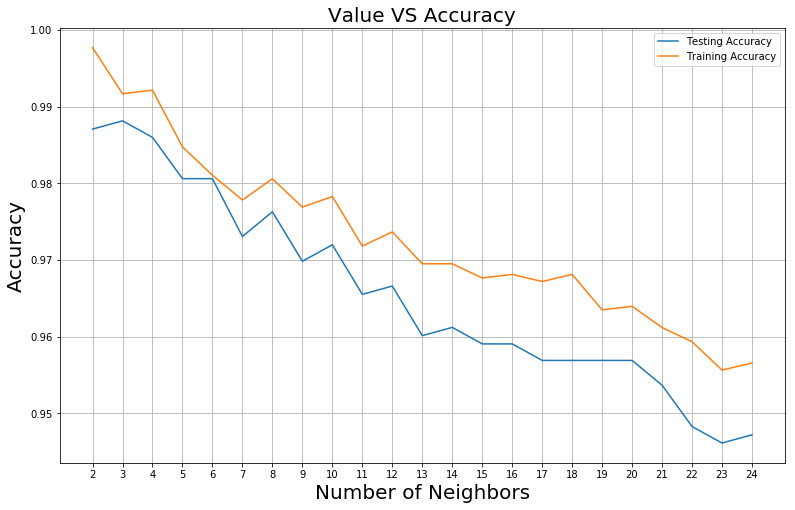

In [114]:
# Model complexity
neig = np.arange(2, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()

In [ ]:
## with k=6 i will build model 

In [115]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=6) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9806034482758621


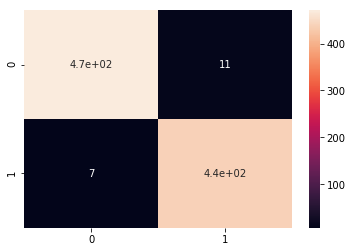

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction )
sns.heatmap(cm, annot=True)

In [128]:
val[val.isnull().any(axis=1)] 

,1,2,3
16,NaN,0.35,9.0
72,0.77,NaN,9.0
79,0.60,0.33,NaN
96,0.46,NaN,22.0
753,NaN,0.28,20.0
762,0.51,0.30,NaN
822,0.74,NaN,15.0
826,NaN,0.22,NaN
838,NaN,0.19,19.0
840,0.46,NaN,NaN


In [133]:
val['1']=val['1'].fillna(0.60)
val['2']=val['2'].fillna(0.22)
val['3']=val['3'].fillna(16)

In [135]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       855 non-null    float64
 1   2       855 non-null    float64
 2   3       855 non-null    float64
dtypes: float64(3)
memory usage: 20.2 KB


In [147]:
pred=knn.predict(val)

In [149]:
Counter(pred)

Counter({0: 658, 1: 197})

In [150]:
val['Target']=pred

In [151]:
val.head()

,1,2,3,Target
0,0.74,0.21,22.0,0
1,0.43,0.15,14.0,0
2,0.77,0.10,15.0,1
3,0.57,0.31,15.0,0
4,0.80,0.31,20.0,0


In [152]:
val.to_csv(r"C:\Users\bhavya.bhav\Desktop\CCTech\class_output.csv")